# WeatherPy
----

#### Observations and Analysis:
1. According to the linear regression that models the correlation between northern hemisphere latitude and its correspoding max temperature, there exists a very strong negative correlation (r-value > .7) between the two variables. This finding means that as latitude in the northern hemisphere increases, the max temperature decreases, and vice versa. A strong correlation indicates that latitude could be a good predictor of a city's max temperature, although further analysis would need to be conducted to ensure that the data is both reliable and valid.

2. Additionally, the linear regressions below indicate that latitude is not a good predictor of humidity, cloudiness, or wind speed, regardless of the hemisphere. Since the r-values for all these relationships were less than .3, the correlation between latitude and those variables is rather weak.

3. An observation on the analysis, however, is that this data is taken on a day-by-day basis, so these numbers (r-values and weather data) could change depending on the day the code is run. A better measure for these relationships could be the average of each variable for a year, so the data wouldn't be skewed depending on season or possible outliers.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create empty lists to hold the data
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Set base url and temperature
url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"

#Create query url
query_url = f"{url}?appid={weather_api_key}&units={units}&q="
query_url

#Set initial counts
record = 0
set = 1

#Loop through cities and append weather data to empty lists
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    response = requests.get(query_url + city)
    try:
        results = response.json()
        cloudiness.append(results["clouds"]["all"])
        country.append(results["sys"]["country"])
        date.append(results["dt"])
        humidity.append(results["main"]["humidity"])
        lat.append(results["coord"]["lat"])
        lng.append(results["coord"]["lon"])
        max_temp.append(results["main"]["temp_max"])
        wind_speed.append(results["wind"]["speed"])
        new_cities.append(city)
        if record > 49:
            record = 1
            set += 1 
        else:
            record += 1
        print(f"Processing Record {record} of Set {set} | {city}")
    except Exception as e:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | hambantota
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | bosaso
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | vigrestad
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | nobeoka
Processing Record 14 of Set 1 | mareeba
Processing Record 15 of Set 1 | castro
City not found. Skipping...
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | puerto escondido
Processing Record 19 of Set 1 | shakawe
Processing Record 20 of Set 1 | yate
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | camacha
Processing Record 23 of Set 1 | p

Processing Record 33 of Set 4 | deputatskiy
Processing Record 34 of Set 4 | asau
Processing Record 35 of Set 4 | tasiilaq
Processing Record 36 of Set 4 | dwarka
Processing Record 37 of Set 4 | muzhi
Processing Record 38 of Set 4 | acapulco
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | laguna
City not found. Skipping...
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | sukhumi
City not found. Skipping...
Processing Record 43 of Set 4 | kranuan
Processing Record 44 of Set 4 | cockburn town
Processing Record 45 of Set 4 | ballina
Processing Record 46 of Set 4 | loandjili
City not found. Skipping...
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | epe
Processing Record 49 of Set 4 | concarneau
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | komsomolskiy
Processing Record 4 of Set 5 | novobirilyussy

Processing Record 24 of Set 8 | diu
Processing Record 25 of Set 8 | muros
City not found. Skipping...
Processing Record 26 of Set 8 | longhua
Processing Record 27 of Set 8 | berdigestyakh
Processing Record 28 of Set 8 | yulara
Processing Record 29 of Set 8 | nalut
Processing Record 30 of Set 8 | ushibuka
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 8 | wharton
Processing Record 32 of Set 8 | talara
Processing Record 33 of Set 8 | saint-leu
Processing Record 34 of Set 8 | chabahar
Processing Record 35 of Set 8 | mandan
Processing Record 36 of Set 8 | inhambane
Processing Record 37 of Set 8 | krasnyye chetai
Processing Record 38 of Set 8 | whitehorse
Processing Record 39 of Set 8 | kiama
Processing Record 40 of Set 8 | lompoc
Processing Record 41 of Set 8 | baiyin
Processing Record 42 of Set 8 | santa isabel do rio negro
Processing Record 43 of Set 8 | hovd
City not found. Skipping...
Processing Record 44 of Set 8 | puerto colombia
Processing Record

In [4]:
#Make sure new city list only holds the cities with available info (has to be less of len(cities) from above)
len(new_cities)

556

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a dictionary of lists from above 
weather = {"City": new_cities,
          "Cloudiness": cloudiness,
          "Country": country,
          "Date": date,
          "Humidity": humidity,
          "Lat": lat,
          "Lng": lng,
          "Max Temp": max_temp,
          "Wind Speed": wind_speed}

#Turn dictionary into a dataframe
weather_pd = pd.DataFrame(weather)

#Export city data into a csv
weather_pd.to_csv("city_data.csv", encoding="utf-8")

#Display dataframe
weather_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hamilton,1,US,1585015854,70,39.18,-84.53,45.00,6.93
1,hambantota,0,LK,1585015854,100,6.12,81.12,73.40,3.36
2,busselton,89,AU,1585015854,29,-33.65,115.33,82.00,6.04
3,hobart,20,AU,1585015801,47,-42.88,147.33,64.99,8.05
4,mataura,100,NZ,1585015854,90,-46.19,168.86,52.00,15.01
...,...,...,...,...,...,...,...,...,...
551,qadian,75,IN,1585015937,82,31.82,75.39,66.20,2.24
552,haradok,0,BY,1585015937,55,55.46,29.98,24.98,3.38
553,pafos,0,CY,1585015937,75,34.77,32.42,53.60,6.93
554,margate,0,GB,1585015937,64,51.38,1.39,46.00,10.29


In [6]:
#Count all to make sure that there are over 500 cities and that every city has complete data
weather_pd.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

This code is using the cities' latitudes and max temperature data obtained from the Open Weather API to show if there is a correlation between the two. The code is being used to create a scatter plot between the two variables, showing the relationship between a city's latitude and its max temperature (F).


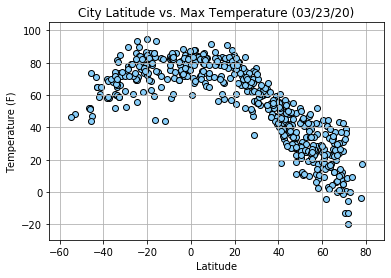

In [29]:
#Set x and y values by turning data into a list
x_values = weather_pd["Lat"].tolist()
y_values = weather_pd["Max Temp"].tolist()

#Graph dat
plt.scatter(x_values, y_values, marker="o", color="lightskyblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (03/23/20)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)
plt.grid(True)
plt.savefig("Figures/Latitude_MaxTemperature.png")
plt.show

#Explanation of code and analysis
print(f"This code is using the cities' latitudes and max temperature data obtained from the Open Weather API to show if there \
is a correlation between the two. The code is being used to create a scatter plot between the two variables, showing \
the relationship between a city's latitude and its max temperature (F).")

#### Latitude vs. Humidity Plot

This code is using the cities' latitudes and humidity data obtained from the Open Weather API to show if there is a correlation between the two. The scatter plot created from this code intends to show how a city's latitude might affect that city's humidity (%).


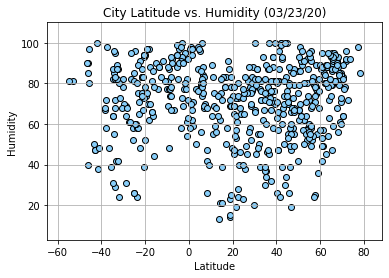

In [28]:
#Set new y value by turning data into a list
y_val = weather_pd["Humidity"].tolist()

#Graph dat
plt.scatter(x_values, y_val, marker="o", color="lightskyblue", edgecolor="black")
plt.title("City Latitude vs. Humidity (03/23/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_val) - 10, max(y_val) + 10)
plt.grid(True)
plt.savefig("Figures/Latitude_Humidity.png")
plt.show

#Explanation of code and analysis
print(f"This code is using the cities' latitudes and humidity data obtained from the Open Weather API to show if there \
is a correlation between the two. The scatter plot created from this code intends to show how a city's latitude might affect \
that city's humidity (%).")

#### Latitude vs. Cloudiness Plot

This code is using the cities' latitudes and cloudiness data obtained from the Open Weather API to show if there is a correlation between the two. By creating a scatter plot, this code intends to analyse how a city's latitude might have an affect on that city's cloudiness (%).


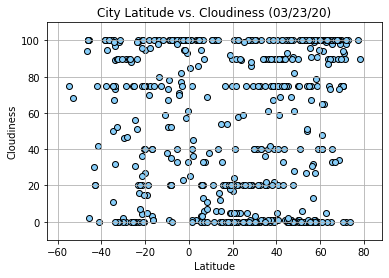

In [27]:
#Set new y value by turning data into a list
y_vals = weather_pd["Cloudiness"].tolist()

#Graph dat
plt.scatter(x_values, y_vals, marker="o", color="lightskyblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (03/23/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_vals) - 10, max(y_vals) + 10)
plt.grid(True)
plt.savefig("Figures/Latitude_Cloudiness.png")
plt.show

#Explanation of code and analysis
print(f"This code is using the cities' latitudes and cloudiness data obtained from the Open Weather API to show if there \
is a correlation between the two. By creating a scatter plot, this code intends to analyse how a city's latitude might have \
an affect on that city's cloudiness (%).")

#### Latitude vs. Wind Speed Plot

This code is using the cities' latitudes and wind speed data obtained from the Open Weather API to show if there is a correlation between the two. In order to determine if there is a relationship between these two variables, this code plots a scatter plot that depicts a city's wind speed (mph) depending on its latitude.


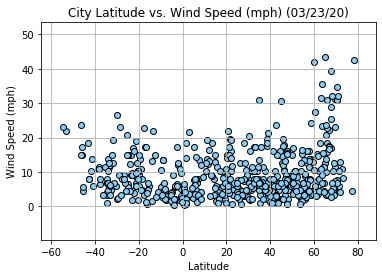

In [26]:
#Set new y value by turning data into a list
y_valu = weather_pd["Wind Speed"].tolist()

#Graph dat
plt.scatter(x_values, y_valu, marker="o", color="lightskyblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (mph) (03/23/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_valu) - 10, max(y_valu) + 10)
plt.grid(True)
plt.savefig("Figures/Latitude_WindSpeed.png")
plt.show

#Explanation of code and analysis
print(f"This code is using the cities' latitudes and wind speed data obtained from the Open Weather API to show if there \
is a correlation between the two. In order to determine if there is a relationship between these two variables, this code \
plots a scatter plot that depicts a city's wind speed (mph) depending on its latitude.")

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_pd.loc[weather_pd["Lat"]>=0]
northern = northern.reset_index(drop=True)

southern = weather_pd.loc[weather_pd["Lat"]<0]
southern = southern.reset_index(drop=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared: -0.8933297491198137
In this figure, the linear regression is modeling the relationship between latitude in the northern hemisphere and its max temperature. According to the r-value of -0.893, there is a strong negative correlation between northern hemisphere latitudes and max temperatures. In other words, as northern hemisphere latitudes increase, the max temperature of the corresponding latitude decreases.


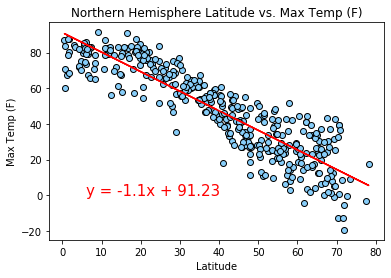

In [16]:
#Create x and y values and change datatype of x values
n_x_values = northern["Lat"].astype('float')
n_temp = northern["Max Temp"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_temp)
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_x_values, n_temp, marker="o", color="lightskyblue", edgecolor="black")
plt.plot(n_x_values, regress_values, "r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere Latitude vs. Max Temp (F)")
print(f"The r-squared: {rvalue}")

#Explain dat code
print(f"In this figure, the linear regression is modeling the relationship between \
latitude in the northern hemisphere and its max temperature. According to the r-value of \
{round(rvalue, 3)}, there is a strong negative correlation between northern hemisphere latitudes \
and max temperatures. In other words, as northern hemisphere latitudes increase, the max \
temperature of the corresponding latitude decreases.")

plt.savefig("Figures/North_Lat_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared: 0.5335705008138949
In the figure below, the linear regression model showcases the relationship between latitude in the southern hemisphere and its corresponding max temperature. Since the r-value is 0.534, this indicates that there is a moderate positive correlation between southern hemisphere latitudes and their max temperatures. Ultimately, this correlation suggests that as southern hemisphere latitudes increase, typically so does the max temperature.


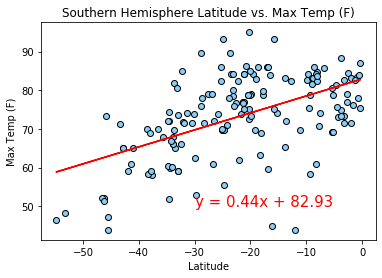

In [18]:
#Create x and y values and change datatype of x values
s_x_values = southern["Lat"].astype('float')
s_temp = southern["Max Temp"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_temp)
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_x_values, s_temp, marker="o", color="lightskyblue", edgecolor="black")
plt.plot(s_x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere Latitude vs. Max Temp (F)")
print(f"The r-squared: {rvalue}")

#Explain dat code
print(f"In the figure below, the linear regression model showcases the relationship between \
latitude in the southern hemisphere and its corresponding max temperature. Since the r-value is \
{round(rvalue, 3)}, this indicates that there is a moderate positive correlation between southern hemisphere \
latitudes and their max temperatures. Ultimately, this correlation suggests that as southern hemisphere \
latitudes increase, typically so does the max temperature.")

plt.savefig("Figures/South_Lat_Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared: 0.17955029616123105
The linear regression below is modeling the relationship between latitude in the northern hemisphere and its corresponding humidity (%). With an r-value of 0.18, this linear regression shows that there is a pretty weak correlation between northern hemisphere latitudes and humidity (%). This analysis indicates that despite the latitude in the northern hemisphere, the humidity could still vary between 13% and 100%, as other factors besides latitude might need to be taken into account.


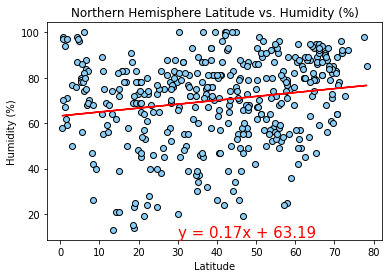

In [19]:
#Get y-values
n_hum = northern["Humidity"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_hum)
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_x_values, n_hum, marker="o", color="lightskyblue", edgecolor="black")
plt.plot(n_x_values, regress_values, "r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere Latitude vs. Humidity (%)")
print(f"The r-squared: {rvalue}")

#Explain dat code
print(f"The linear regression below is modeling the relationship between \
latitude in the northern hemisphere and its corresponding humidity (%). With an r-value of \
{round(rvalue, 3)}, this linear regression shows that there is a pretty weak correlation between northern \
hemisphere latitudes and humidity (%). This analysis indicates that despite the \
latitude in the northern hemisphere, the humidity could still vary between {min(n_hum)}% and \
{max(n_hum)}%, as other factors besides latitude might need to be taken into account.")

plt.savefig("Figures/North_Lat_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared: 0.2622947733902811
Similarly, this linear regression models the relationship between latitude in the southern hemisphere and its corresponding humidity (%). With an r-value of 0.262, this linear regression shows that there is a none or a very weak correlation between southern hemisphere latitudes and humidity (%). As mentioned above, this indicates that despite the latitude in the southern hemisphere, the humidity could still vary between 24% and 100%, as there might be other factors at play that affect humidity.


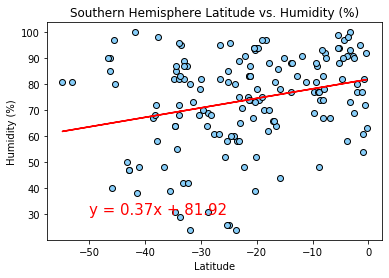

In [20]:
#Get y-values
s_hum = southern["Humidity"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_hum)
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_x_values, s_hum, marker="o", color="lightskyblue", edgecolor="black")
plt.plot(s_x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere Latitude vs. Humidity (%)")
print(f"The r-squared: {rvalue}")

#Explain dat code
print(f"Similarly, this linear regression models the relationship between \
latitude in the southern hemisphere and its corresponding humidity (%). With an r-value of \
{round(rvalue, 3)}, this linear regression shows that there is a none or a very weak correlation between \
southern hemisphere latitudes and humidity (%). As mentioned above, this indicates \
that despite the latitude in the southern hemisphere, the humidity could still vary between \
{min(s_hum)}% and {max(s_hum)}%, as there might be other factors at play that affect humidity.")

plt.savefig("Figures/South_Lat_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared: 0.2984443383112236
The linear regression below models the relationship between latitude in the northern hemisphere and cloudiness (%) at that latitude. With an r-value of 0.298, this linear regression shows that there is none or a very weak correlation between northern hemisphere latitudes and cloudiness (%). This analysis indicates that despite the latitude in the northern hemisphere, the cloudiness could still vary between 0% and 100%, as cloudiness could be affected by other factors besides latitude.


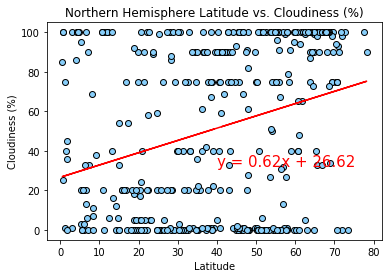

In [23]:
#Get y-values
n_floof = northern["Cloudiness"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_floof)
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_x_values, n_floof, marker="o", color="lightskyblue", edgecolor="black")
plt.plot(n_x_values, regress_values, "r-")
plt.annotate(line_eq,(40,32),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere Latitude vs. Cloudiness (%)")
print(f"The r-squared: {rvalue}")

#Explain dat code
print(f"The linear regression below models the relationship between \
latitude in the northern hemisphere and cloudiness (%) at that latitude. With an r-value of \
{round(rvalue, 3)}, this linear regression shows that there is none or a very weak correlation between northern \
hemisphere latitudes and cloudiness (%). This analysis indicates that despite the \
latitude in the northern hemisphere, the cloudiness could still vary between {min(n_floof)}% and \
{max(n_floof)}%, as cloudiness could be affected by other factors besides latitude.")

plt.savefig("Figures/North_Lat_Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared: 0.08285699965160505
The linear regression below is modeling the relationship between latitude in the southern hemisphere and its corresponding cloudiness (%). With an r-value of 0.083, this linear regression shows that there is a none or a very weak correlation between southern hemisphere latitudes and cloudiness (%). This means that there is not much of a relationship between latitude in the southern hemisphere, or that humidity is not affected by latitude in the southern hemisphere.


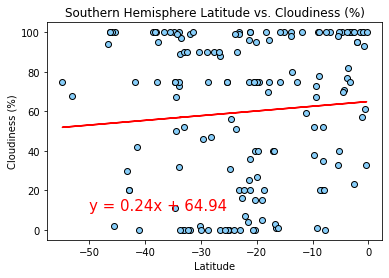

In [22]:
#Get y-values
s_floof = southern["Cloudiness"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_floof)
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_x_values, s_floof, marker="o", color="lightskyblue", edgecolor="black")
plt.plot(s_x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere Latitude vs. Cloudiness (%)")
print(f"The r-squared: {rvalue}")

#Explain dat code
print(f"The linear regression below is modeling the relationship between \
latitude in the southern hemisphere and its corresponding cloudiness (%). With an r-value of \
{round(rvalue, 3)}, this linear regression shows that there is a none or a very weak correlation between \
southern hemisphere latitudes and cloudiness (%). This means that there is not much of a \
relationship between latitude in the southern hemisphere, or that humidity is not affected by \
latitude in the southern hemisphere.")

plt.savefig("Figures/South_Lat_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared: 0.2776102738658565
The figure below depicits the linear regression between latitude in the northern hemisphere and wind speed (mph) at that latitude. According to its r-value of 0.278, the correlation is either nonexistent or very week between the two variables. This analysis indicates that wind speed is affected by other factors, since there is no clear relationship to latitude in the northern hemisphere.


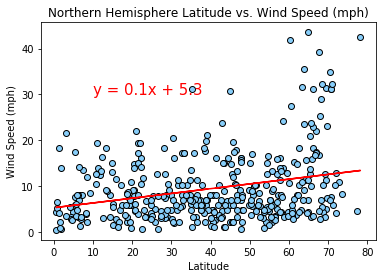

In [24]:
#Get y-values
n_wind = northern["Wind Speed"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_wind)
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_x_values, n_wind, marker="o", color="lightskyblue", edgecolor="black")
plt.plot(n_x_values, regress_values, "r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere Latitude vs. Wind Speed (mph)")
print(f"The r-squared: {rvalue}")

#Explain dat code
print(f"The figure below depicits the linear regression between \
latitude in the northern hemisphere and wind speed (mph) at that latitude. According to its r-value of \
{round(rvalue, 3)}, the correlation is either nonexistent or very week between the two \
variables. This analysis indicates that wind speed is affected by other factors, since \
there is no clear relationship to latitude in the northern hemisphere.")

plt.savefig("Figures/North_Lat_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared: -0.3765431310753967
The linear regression below depicts the correlation between latitude in the southern hemisphere and its corresponding wind speed (mph). With an r-value of -0.377, this linear regression shows that there is a weak negative correlation between southern hemisphere latitudes and wind speed. In other words, this analysis shows that wind speed may be affected by other variables besides latitude.


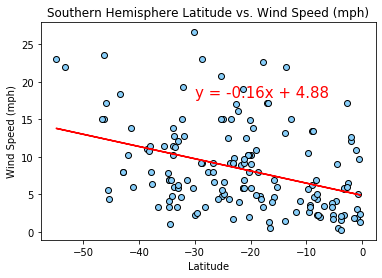

In [30]:
#Get y-values
s_wind = southern["Wind Speed"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_wind)
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_x_values, s_wind, marker="o", color="lightskyblue", edgecolor="black")
plt.plot(s_x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere Latitude vs. Wind Speed (mph)")
print(f"The r-squared: {rvalue}")

#Explain dat code
print(f"The linear regression below depicts the correlation between \
latitude in the southern hemisphere and its corresponding wind speed (mph). With an r-value of \
{round(rvalue, 3)}, this linear regression shows that there is a weak negative correlation between southern \
hemisphere latitudes and wind speed. In other words, this analysis shows that wind speed may be affected by other \
variables besides latitude.")

plt.savefig("Figures/South_Lat_Wind.png")
plt.show()